<a href="https://colab.research.google.com/github/Manashvi123/Stock-Price-prediction-/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [5]:
us_data=pd.read_csv('/content/-last-ten-years.csv')

In [6]:
us_data.head()

,date,gold value,crude oil value,Natural gas value,S&P500 value
0,24-07-2012,1573.00,88.28,3.16,1338.31
1,25-07-2012,1587.50,88.80,3.19,1337.89
2,26-07-2012,1603.00,89.40,3.13,1360.02
3,27-07-2012,1618.75,90.13,3.10,1385.97
4,30-07-2012,1616.50,89.80,3.14,1385.30


In [7]:
us_data.tail()

,date,gold value,crude oil value,Natural gas value,S&P500 value
2509,31-05-2022,1847.26,101.0279,7.68,3818.80
2510,01-06-2022,1848.70,98.2402,7.72,3801.78
2511,02-06-2022,1871.40,102.4885,7.88,3790.38
2512,03-06-2022,1850.20,104.7900,7.37,3863.16
2513,06-06-2022,1843.70,104.7900,6.60,3830.85


In [9]:
us_data.shape

(2514, 5)

In [10]:
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2514 non-null   object 
 1   gold value         2514 non-null   float64
 2    crude oil value   2514 non-null   float64
 3   Natural gas value  2514 non-null   float64
 4   S&P500 value       2514 non-null   float64
dtypes: float64(4), object(1)
memory usage: 98.3+ KB


In [11]:
us_data.isnull().sum()

date                 0
gold value           0
 crude oil value     0
Natural gas value    0
S&P500 value         0
dtype: int64

In [12]:
us_data.describe()

,gold value,crude oil value,Natural gas value,S&P500 value
count,2514.000000,2514.000000,2514.000000,2514.000000
mean,1432.092267,66.059444,3.233214,2629.116714
std,253.660278,22.779770,1.215478,873.343077
min,1049.600000,11.258000,1.330000,1337.890000
25%,1241.987500,48.490000,2.610000,1990.787500
50%,1316.025000,59.715000,2.950000,2438.635000
75%,1682.137500,88.275000,3.700000,3014.167500
max,2058.400000,123.700000,23.860000,4796.560000


In [13]:
correlation = us_data.corr()

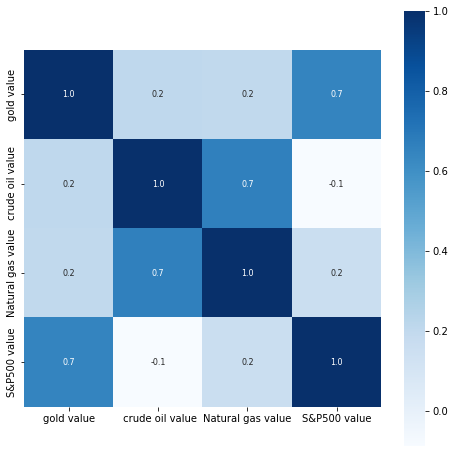

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [25]:
print(correlation['S&P500 value'])

gold value           0.650779
 crude oil value    -0.086918
Natural gas value    0.159963
S&P500 value         1.000000
Name: S&P500 value, dtype: float64


In [28]:
X = us_data.drop(['date','S&P500 value'],axis=1)
Y = us_data['S&P500 value']

In [31]:
print(X)

      gold value   crude oil value  Natural gas value
0        1573.00           88.2800               3.16
1        1587.50           88.8000               3.19
2        1603.00           89.4000               3.13
3        1618.75           90.1300               3.10
4        1616.50           89.8000               3.14
...          ...               ...                ...
2509     1847.26          101.0279               7.68
2510     1848.70           98.2402               7.72
2511     1871.40          102.4885               7.88
2512     1850.20          104.7900               7.37
2513     1843.70          104.7900               6.60

[2514 rows x 3 columns]


In [30]:
print(Y)

0       1338.31
1       1337.89
2       1360.02
3       1385.97
4       1385.30
         ...   
2509    3818.80
2510    3801.78
2511    3790.38
2512    3863.16
2513    3830.85
Name: S&P500 value, Length: 2514, dtype: float64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [35]:
test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[2737.5477 3632.2344 2089.0023 2946.0858 2052.2778 1625.5317 3252.8406
 4172.4292 1926.6077 2082.4354 1948.475  4639.8197 3036.2562 3098.6984
 1423.9145 2269.0297 1940.3898 2131.2102 3480.0387 1503.7202 1461.4827
 4739.9241 1415.8616 1948.144  4636.2335 2321.8175 2053.2224 1507.8975
 3000.0332 2311.7313 3769.2467 4592.4319 1473.6598 1662.6427 2564.2696
 1967.7506 2986.3173 2323.0166 4090.2901 3704.2492 2390.0002 2734.1747
 2456.3448 2300.1422 2059.8264 1931.4814 3459.2984 1758.3275 1816.7069
 2350.6593 4231.3774 2376.9469 2810.6235 2013.5374 2720.9526 2839.0537
 3353.3779 1641.6979 4561.6964 1823.8607 2893.4799 4414.351  2289.9486
 2710.1734 1970.6936 3965.0311 4438.7573 1935.5995 1627.9444 2786.0322
 2182.6876 3967.887  2032.6008 3661.9225 2790.7806 2606.0871 4536.6433
 2104.4786 1927.9389 2168.3235 4007.2145 1793.9054 2244.4358 1963.9229
 2780.6052 3901.0122 1940.6578 1844.6684 4472.2426 2266.0504 1756.3232
 2809.8684 1482.1494 1634.7745 2248.2766 2091.4231 1841.1303 3096.7629
 2762.

In [37]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9851265606307911


In [38]:
Y_test = list(Y_test)

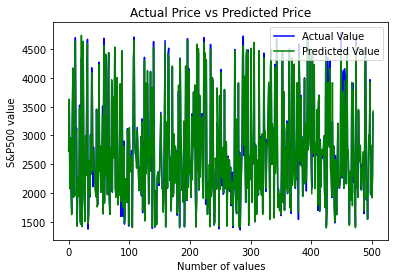

In [39]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('S&P500 value')
plt.legend()
plt.show()